In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("marathon_results_2015.csv")
df.head()



,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


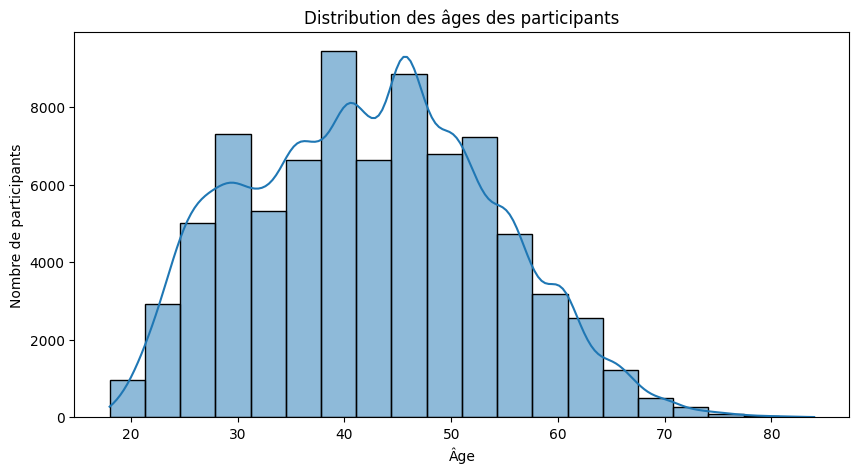

In [125]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution des âges des participants")
plt.xlabel("Âge")
plt.ylabel("Nombre de participants")
plt.show()


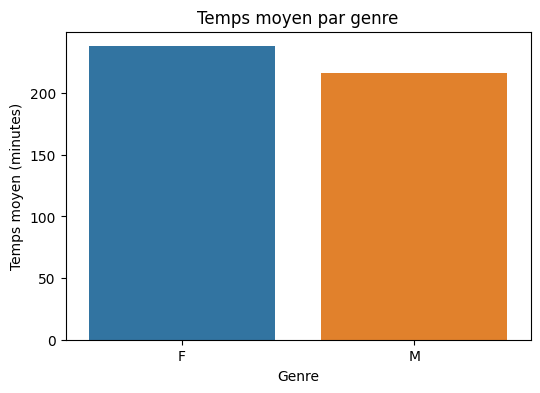

In [89]:
df["Official Time (min)"] = df["Official Time"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))
mean_time_by_gender = df.groupby("M/F")["Official Time (min)"].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=mean_time_by_gender.index, y=mean_time_by_gender.values)
plt.title("Temps moyen par genre")
plt.xlabel("Genre")
plt.ylabel("Temps moyen (minutes)")
plt.show()


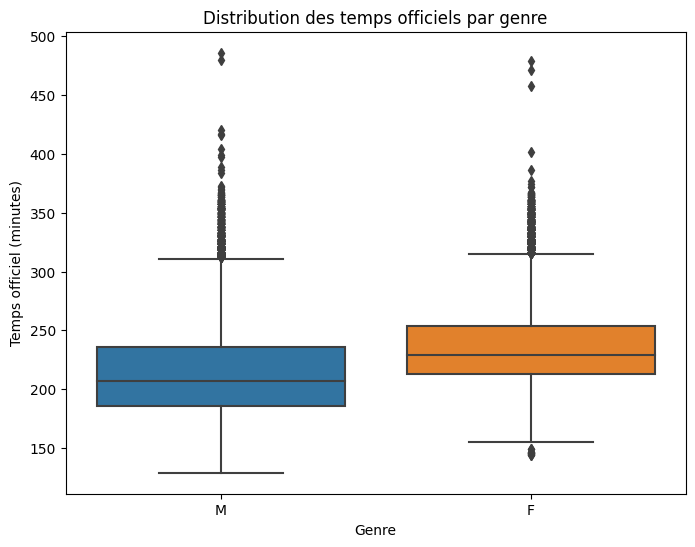

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["M/F"], y=df["Official Time (min)"])
plt.title("Distribution des temps officiels par genre")
plt.xlabel("Genre")
plt.ylabel("Temps officiel (minutes)")
plt.show()
plt.savefig("mon_graphique.png", dpi=300)


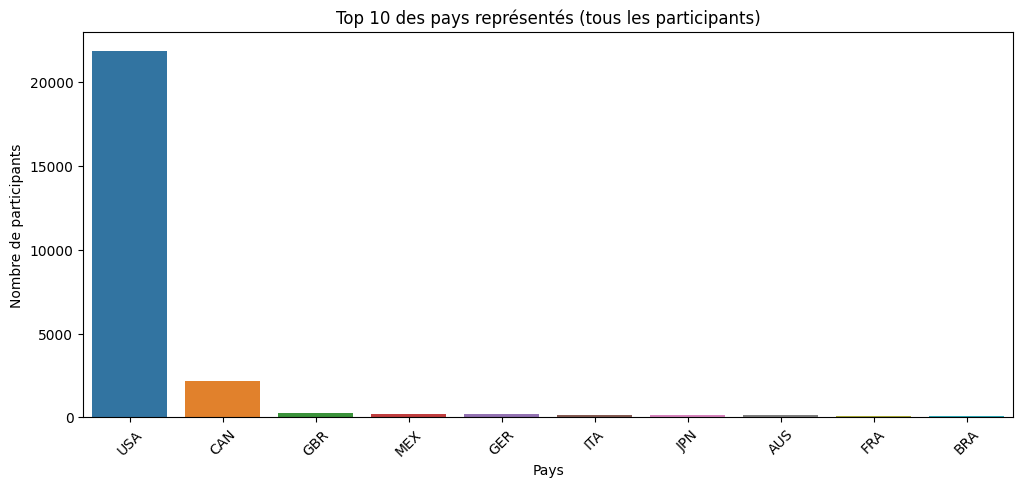

In [91]:
top_countries_all = df["Country"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries_all.index, y=top_countries_all.values)
plt.title("Top 10 des pays représentés (tous les participants)")
plt.xlabel("Pays")
plt.ylabel("Nombre de participants")
plt.xticks(rotation=45)
plt.show()


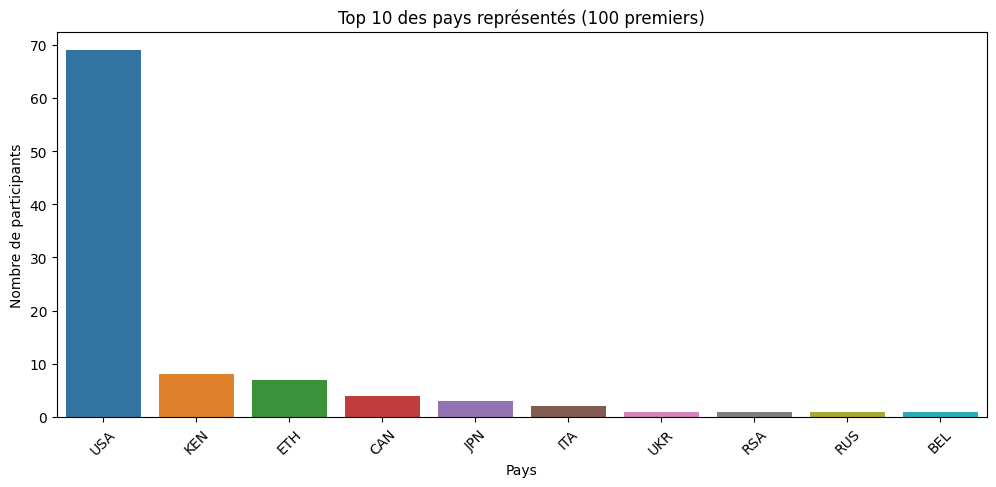

In [92]:
top_100 = df.nsmallest(100, "Overall")  # Sélectionne les 100 premiers au classement général
top_countries_100 = top_100["Country"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries_100.index, y=top_countries_100.values)
plt.title("Top 10 des pays représentés (100 premiers)")
plt.xlabel("Pays")
plt.ylabel("Nombre de participants")
plt.xticks(rotation=45)
plt.show()


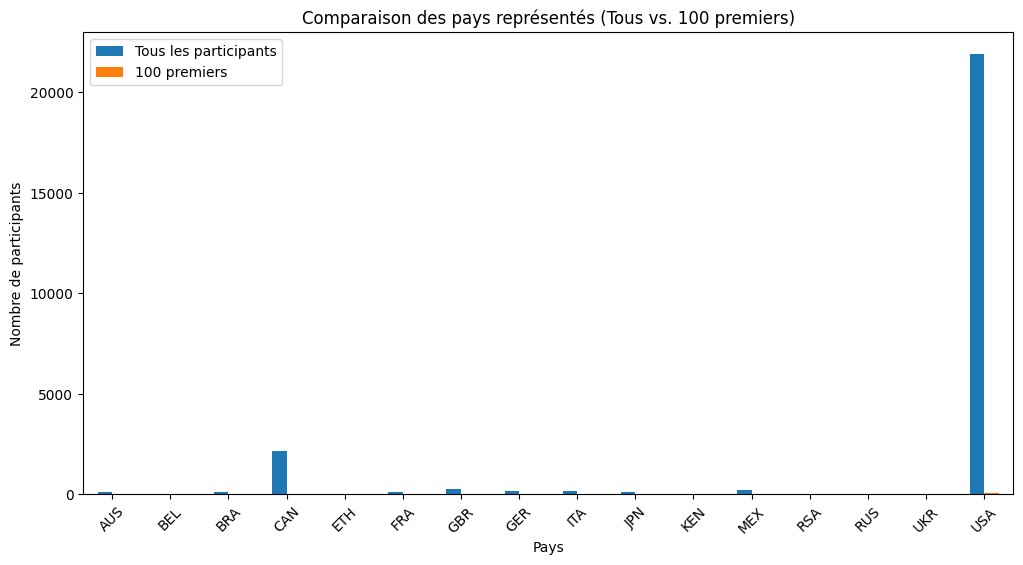

In [93]:
top_countries_df = pd.DataFrame({
    "Tous les participants": top_countries_all,
    "100 premiers": top_countries_100
}).fillna(0)

top_countries_df.plot(kind="bar", figsize=(12, 6))
plt.title("Comparaison des pays représentés (Tous vs. 100 premiers)")
plt.xlabel("Pays")
plt.ylabel("Nombre de participants")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [99]:
files = ["marathon_results_2015.csv", "marathon_results_2017.csv", "marathon_results_2017.csv"]

df_list = [pd.read_csv(file) for file in files]

# Ajouter une colonne 'Year' pour identifier l'année
years = [2015, 2016, 2017]
for i, df in enumerate(df_list):
    df['Year'] = years[i]

# Concaténer toutes les années en un seul DataFrame
df = pd.concat(df_list, ignore_index=True)

# Convertir les temps en minutes
cols = ["Official Time"]
def time_to_minutes(time_str):
    try:
        parts = time_str.split(':')
        return int(parts[0]) * 60 + int(parts[1])
    except:
        return None

df[cols] = df[cols].applymap(time_to_minutes)


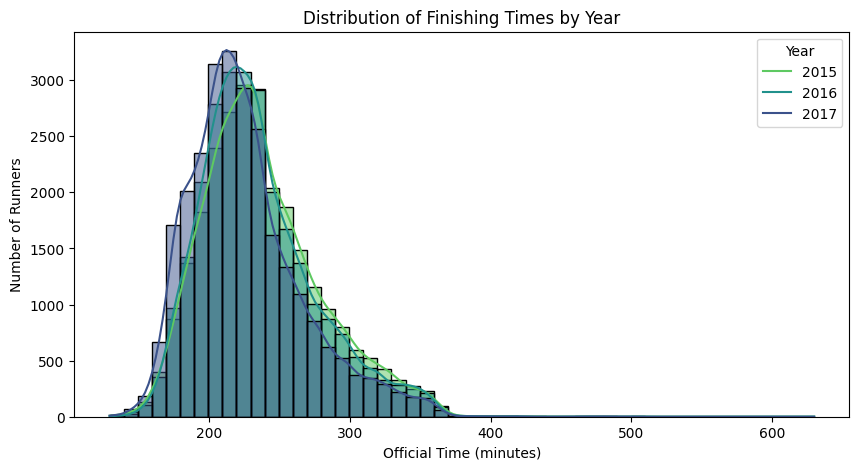

In [106]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Official Time", bins=50, kde=True, hue=df["Year"].astype(str), palette="viridis")
plt.xlabel("Official Time (minutes)")
plt.ylabel("Number of Runners")
plt.title("Distribution of Finishing Times by Year")
plt.legend(title="Year", labels=[str(y) for y in years])
plt.show()


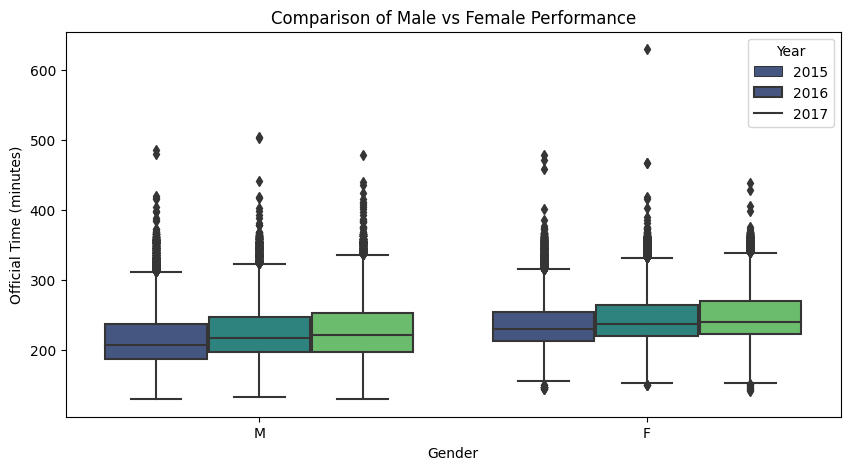

In [107]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="M/F", y="Official Time", hue=df["Year"].astype(str), palette="viridis")
plt.xlabel("Gender")
plt.ylabel("Official Time (minutes)")
plt.title("Comparison of Male vs Female Performance")
plt.legend(title="Year", labels=[str(y) for y in years])
plt.show()

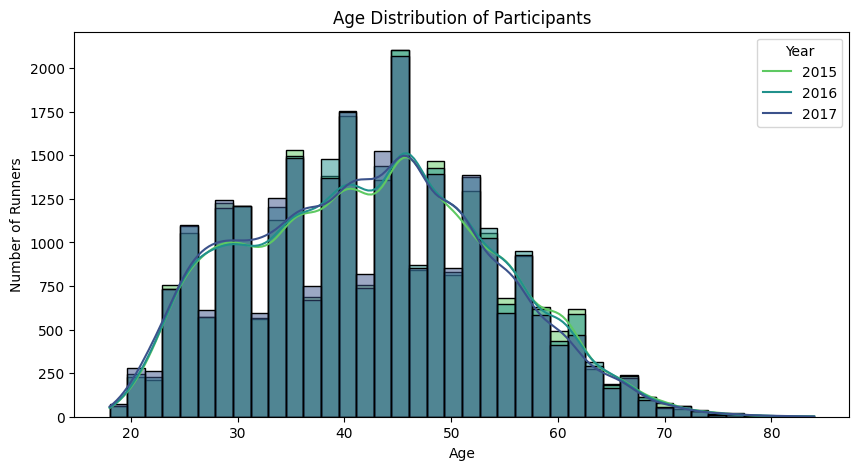

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Age", bins=40, hue=df["Year"].astype(str), kde=True, palette="viridis")
plt.xlabel("Age")
plt.ylabel("Number of Runners")
plt.title("Age Distribution of Participants")
plt.legend(title="Year", labels=[str(y) for y in years])
plt.show()


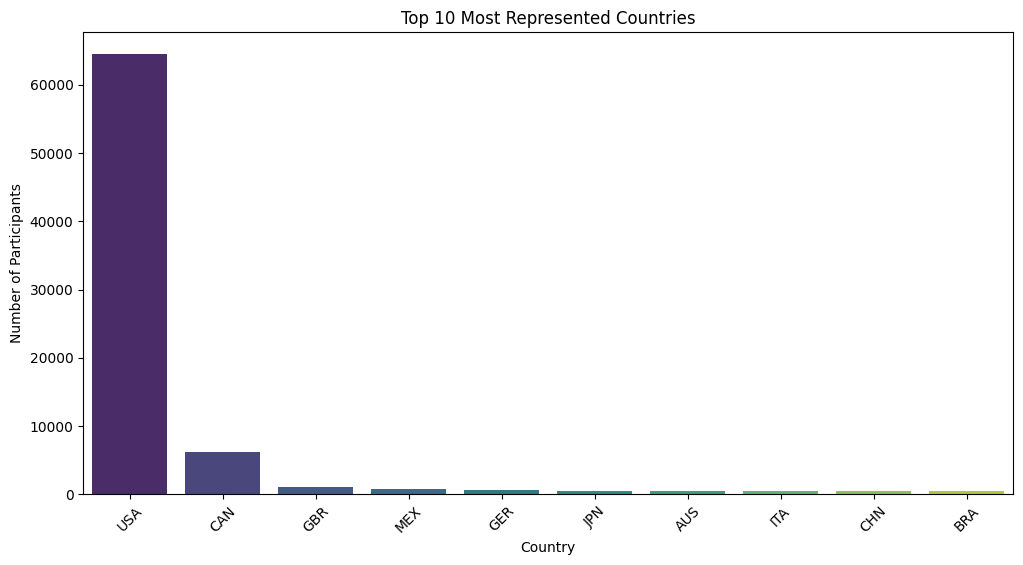

In [110]:
plt.figure(figsize=(12, 6))
top_countries = df["Country"].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Number of Participants")
plt.title("Top 10 Most Represented Countries")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Overall,Gender,Division,Year,Unnamed: 8,0K,5K_Speed,10K_Speed,15K_Speed,20K_Speed
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1,1,1,2015,NaN,0,2.8,3.0,3.0,3.2
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2,2,2,2015,NaN,0,2.8,3.0,3.0,3.2
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,3,3,3,2015,NaN,0,2.8,3.0,3.0,3.2
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,4,4,4,2015,NaN,0,2.8,3.0,3.2,3.0
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,5,5,5,2015,NaN,0,2.8,3.0,3.0,3.2


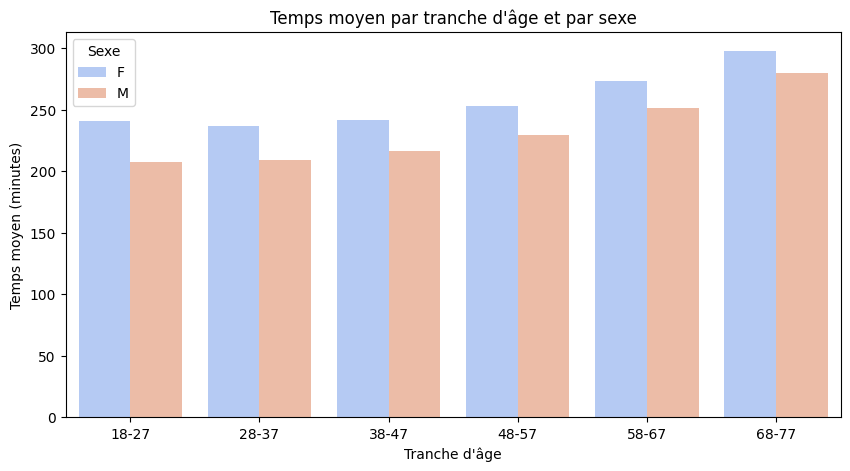

In [ ]:
df["Age Group"] = pd.cut(df["Age"], bins=range(18, 81, 10), right=False, labels=["18-27", "28-37", "38-47", "48-57", "58-67", "68-77"])
df_age_speed = df.groupby(["Age Group", "M/F"])["Official Time"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=df_age_speed, x="Age Group", y="Official Time", hue="M/F", palette="coolwarm")
plt.xlabel("Tranche d'âge")
plt.ylabel("Temps moyen (minutes)")
plt.title("Temps moyen par tranche d'âge et par sexe")
plt.legend(title="Sexe")
plt.show()

In [121]:
time_cols = ["5K", "10K", "15K", "20K", "25K", "30K", "35K", "40K", "Official Time"]
def time_to_minutes(time_str):
    try:
        parts = time_str.split(':')
        return int(parts[0]) * 60 + int(parts[1])
    except:
        return None

df[time_cols] = df[time_cols].applymap(time_to_minutes)

# Compute pace per segment (in min/km)
df["Segment_0_5"] = df["5K"] / 5
df["Segment_5_10"] = (df["10K"] - df["5K"]) / 5
df["Segment_10_15"] = (df["15K"] - df["10K"]) / 5
df["Segment_15_20"] = (df["20K"] - df["15K"]) / 5
df["Segment_20_25"] = (df["25K"] - df["20K"]) / 5
df["Segment_25_30"] = (df["30K"] - df["25K"]) / 5
df["Segment_30_35"] = (df["35K"] - df["30K"]) / 5
df["Segment_35_40"] = (df["40K"] - df["35K"]) / 5

df = df[[col for col in df.columns if "Segment_" not in col or pd.api.types.is_numeric_dtype(df[col])]]

segment_cols = [
    "Segment_0_5", "Segment_5_10", "Segment_10_15", "Segment_15_20",
    "Segment_20_25", "Segment_25_30", "Segment_30_35", "Segment_35_40"
]


In [123]:
df_segments = df[segment_cols].mean(numeric_only=True).reset_index()
df_segments.columns = ["Segment", "Avg Pace (min/km)"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_segments, x="Segment", y="Avg Pace (min/km)", marker="o")
plt.title("Average Pace per Segment (km 0 to 40)")
plt.xlabel("Segment")
plt.ylabel("Pace (min/km)")
plt.xticks(rotation=45)
plt.show()

KeyError: "None of [Index(['Segment_0_5', 'Segment_5_10', 'Segment_10_15', 'Segment_15_20',\n       'Segment_20_25', 'Segment_25_30', 'Segment_30_35', 'Segment_35_40'],\n      dtype='object')] are in the [columns]"

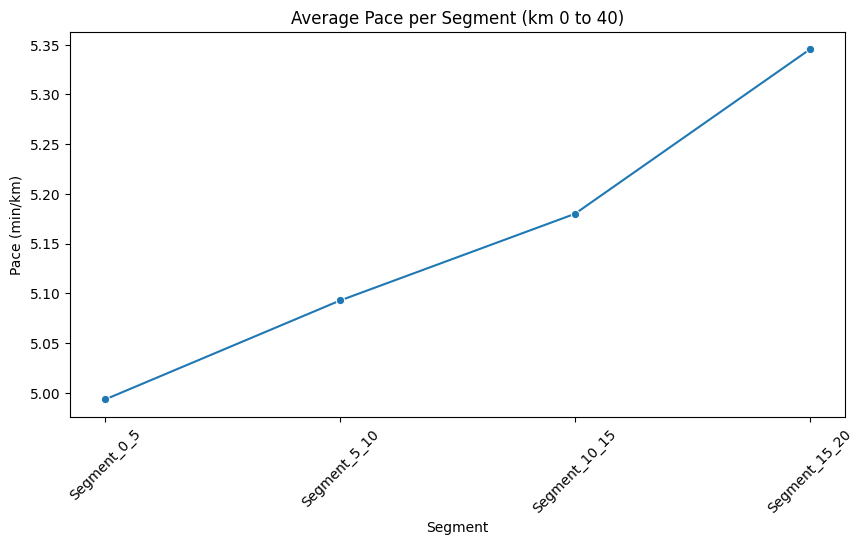

In [120]:
df_segments = df[segment_cols].mean().reset_index()
df_segments.columns = ["Segment", "Avg Pace (min/km)"]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_segments, x="Segment", y="Avg Pace (min/km)", marker="o")
plt.title("Average Pace per Segment (km 0 to 40)")
plt.xlabel("Segment")
plt.ylabel("Pace (min/km)")
plt.xticks(rotation=45)
plt.show()


In [115]:
df_box = df.melt(value_vars=segment_cols, var_name="Segment", value_name="Pace")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x="Segment", y="Pace")
plt.title("Distribution of Segment Paces")
plt.xlabel("Segment")
plt.ylabel("Pace (min/km)")
plt.show()

ValueError: value_name (Pace) cannot match an element in the DataFrame columns.

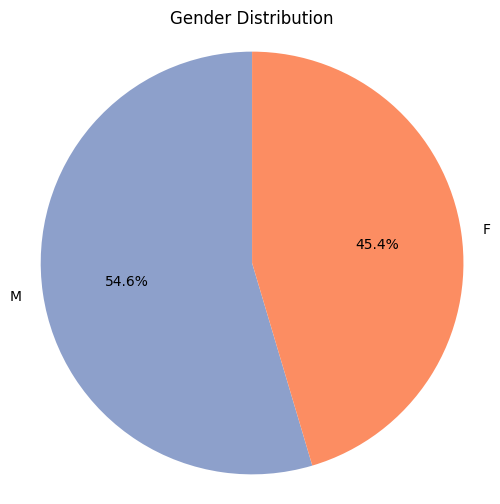

In [130]:
gender_counts = df["M/F"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=["#8da0cb", "#fc8d62"])
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()


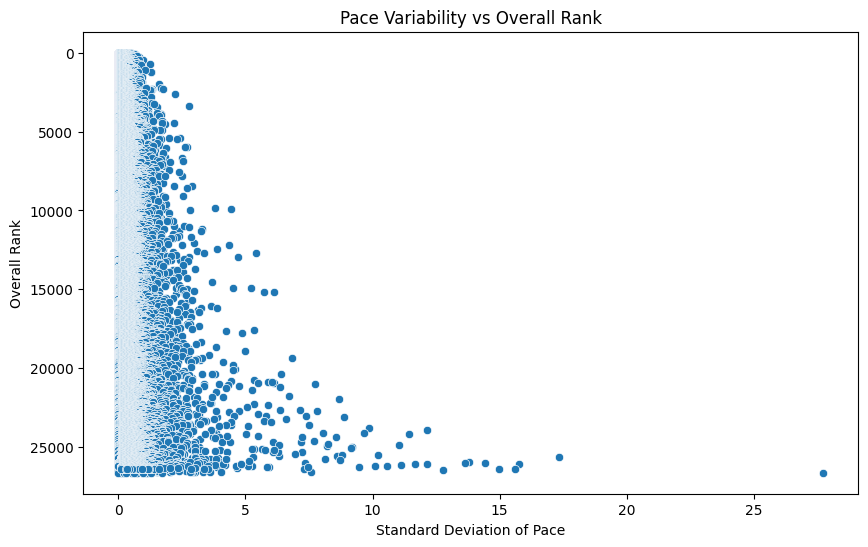

In [116]:
df["Pace Std"] = df[["Segment_25_30", "Segment_30_35", "Segment_35_40"]].std(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Pace Std", y="Overall")
plt.title("Pace Variability vs Overall Rank")
plt.xlabel("Standard Deviation of Pace")
plt.ylabel("Overall Rank")
plt.gca().invert_yaxis()
plt.show()